In this mission, we'll learn the basics of data cleaning with pandas as we work with laptops.csv, a CSV file containing information about 1,300 laptop computers. The first five rows of the CSV file are shown below:

In [75]:
import pandas as pd
import numpy as np

In [76]:
laptops = pd.read_csv('laptops.csv', encoding = 'Latin-1')
laptops.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


### Cleaning column names

In [77]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              1303 non-null   object
 1   Model Name                1303 non-null   object
 2   Category                  1303 non-null   object
 3   Screen Size               1303 non-null   object
 4   Screen                    1303 non-null   object
 5   CPU                       1303 non-null   object
 6   RAM                       1303 non-null   object
 7    Storage                  1303 non-null   object
 8   GPU                       1303 non-null   object
 9   Operating System          1303 non-null   object
 10  Operating System Version  1133 non-null   object
 11  Weight                    1303 non-null   object
 12  Price (Euros)             1303 non-null   object
dtypes: object(13)
memory usage: 132.5+ KB


We can see that every column is represented as the object type, indicating that they are represented by strings, not numbers. Also, one of the columns, Operating System Version, has null values.

The column labels have a variety of upper and lowercase letters, as well as spaces and parentheses, which will make them harder to work with and read. One noticeable issue is that the " Storage" column name has a space in front of it. These quirks with column labels can sometimes be hard to spot, so removing extra whitespaces from all column names will save us more work in the long run.

We can access the column axis of a dataframe using the `DataFrame.columns` attribute. This returns an index object — a special type of NumPy ndarray — with the labels of each column:

In [78]:
laptops.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')

Not only can we use the attribute to view the column labels, we can also assign new labels to the attribute:

In [79]:
laptops_test = laptops.copy()
laptops_test.columns = ['A', 'B', 'C', 'D', 'E',
                        'F', 'G', 'H', 'I', 'J',
                        'K', 'L', 'M']
print(laptops_test.columns)

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'], dtype='object')


Next, let's use the DataFrame.columns attribute to remove whitespaces from the column names.

In [80]:
new_columns = []

for c in laptops.columns:
    new_columns.append( c.strip() )
    
print(new_columns)
laptops.columns = new_columns

['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen', 'CPU', 'RAM', 'Storage', 'GPU', 'Operating System', 'Operating System Version', 'Weight', 'Price (Euros)']


In the last exercise, we removed whitespaces from the column names.
However, the column labels still have a variety of upper and lowercase letters, as well as parentheses, which will make them harder to work with and read. Let's finish cleaning our column labels by:

- Replacing spaces with underscores.
- Removing special characters.
- Making all labels lowercase.
- Shortening any long column names.

We can create a function that uses Python string methods to clean our column labels, and then again use a loop to apply that function to each label. Let's look at an example:

In [81]:
def clean_col(col):
    col = col.strip()
    col = col.replace("(","")
    col = col.replace(")","")
    col = col.lower()
    return col

new_columns = []
for c in laptops.columns:
    clean_c = clean_col(c)
    new_columns.append(clean_c)

laptops.columns = new_columns
print(laptops.columns)

Index(['manufacturer', 'model name', 'category', 'screen size', 'screen',
       'cpu', 'ram', 'storage', 'gpu', 'operating system',
       'operating system version', 'weight', 'price euros'],
      dtype='object')


### Converting string columns to numeric

We observed earlier that all 13 columns have the object dtype, meaning they're stored as strings. Let's look at the first few rows of some of our columns:

In [82]:
print(laptops.iloc[:5,2:5])

    category screen size                              screen
0  Ultrabook       13.3"  IPS Panel Retina Display 2560x1600
1  Ultrabook       13.3"                            1440x900
2   Notebook       15.6"                   Full HD 1920x1080
3  Ultrabook       15.4"  IPS Panel Retina Display 2880x1800
4  Ultrabook       13.3"  IPS Panel Retina Display 2560x1600


Of these three columns, we have three different types of text data:

- `category`: Purely text data - there are no numeric values.
- `screen_size`: Numeric data stored as text data because of the " character.
- `screen`: A combination of pure text data with numeric data.

Because the values in the screen_size column are stored as text data, we can't sort them numerically. For instance, if we wanted to select laptops with screens 15" or larger, we'd be unable to do so.

Let's convert the screen_size column to numeric next. Whenever we convert text to numeric data, we can follow this data cleaning workflow:

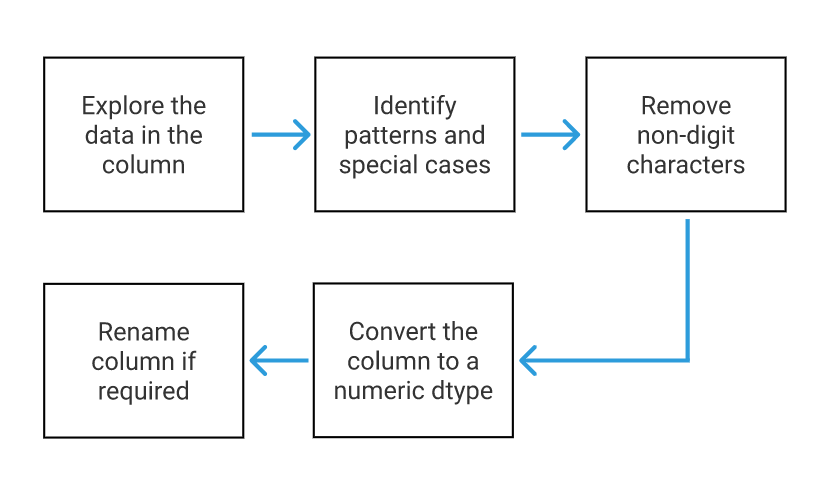

The first step is to explore the data. One of the best ways to do this is to use the Series.unique() method to view all of the unique values in the column:

In [83]:
print(laptops["screen size"].dtype)
print(laptops["screen size"].unique())

object
['13.3"' '15.6"' '15.4"' '14.0"' '12.0"' '11.6"' '17.3"' '10.1"' '13.5"'
 '12.5"' '13.0"' '18.4"' '13.9"' '12.3"' '17.0"' '15.0"' '14.1"' '11.3"']


Our next step is to identify patterns and special cases. We can observe the following:

- All values in this column follow the same pattern - a series of digit and period characters, followed by a quote character (").
- There are no special cases. Every value matches the same pattern.
- We'll need to convert the column to a float dtype, as the int dtype won't be able to store the decimal values.

Let's identify any patterns and special cases in the ram column next.

In [84]:
print(laptops['ram'].dtype)
unique_ram = laptops['ram'].unique()
unique_ram

object


array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

To convert both the ram and screen_size columns to numeric dtypes, we'll have to first remove the non-digit characters.

The pandas library contains dozens of vectorized string methods we can use to manipulate text data, many of which perform the same operations as Python string methods. Most vectorized string methods are available using the Series.str accessor, which means we can access them by adding str between the series name and the method name:

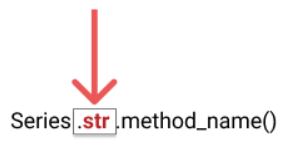

In this case, we can use the `Series.str.replace()` method, which is a vectorized version of the Python `str.replace()` method we used in the previous screen, to remove all the quote characters from every string in the screen_size column:

In [85]:
laptops["screen size"] = laptops["screen size"].str.replace('"','')

print(laptops["screen size"].unique())

['13.3' '15.6' '15.4' '14.0' '12.0' '11.6' '17.3' '10.1' '13.5' '12.5'
 '13.0' '18.4' '13.9' '12.3' '17.0' '15.0' '14.1' '11.3']


Let's remove the non-digit characters from the ram column next.

In [86]:
laptops['ram'] = laptops['ram'].str.replace('GB','')

unique_ram = laptops['ram'].unique()
unique_ram

array(['8', '16', '4', '2', '12', '6', '32', '24', '64'], dtype=object)

Now, we can **convert (or cast) the columns to a numeric dtype**.

To do this, we use the Series.astype() method. To convert the column to a numeric dtype, we can use either int or float as the parameter for the method. Since the int dtype can't store decimal values, we'll convert the screen_size column to the float dtype:

In [87]:
laptops["screen size"] = laptops["screen size"].astype(float)
print(laptops["screen size"].dtype)
print(laptops["screen size"].unique())

float64
[13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]


In [88]:
laptops["ram"] = laptops["ram"].str.replace('GB','')

laptops['ram'] = laptops['ram'].astype(int)

laptops['ram'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64])

#### Renaming columns

Now that we've converted our columns to numeric dtypes, the final step is to rename the column. This is an optional step, and can be useful if the non-digit values contain information that helps us understand the data.

In our case, the quote characters we removed from the screen_size column denoted that the screen size was in inches.

To stop us from losing information that helps us understand the data, we can use the DataFrame.rename() method to rename the column from screen_size to screen_size_inches

Below, we specify the axis=1 parameter so pandas knows that we want to rename labels in the column axis:

In [89]:
laptops.rename({"screen size": "screen_size_inches"}, axis=1, inplace=True)
print(laptops.dtypes)

manufacturer                 object
model name                   object
category                     object
screen_size_inches          float64
screen                       object
cpu                          object
ram                           int32
storage                      object
gpu                          object
operating system             object
operating system version     object
weight                       object
price euros                  object
dtype: object


In [90]:
laptops.rename({'ram': 'ram_gb'}, axis = 1, inplace = True)

laptops['ram_gb'].describe()

count    1303.000000
mean        8.382195
std         5.084665
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        64.000000
Name: ram_gb, dtype: float64

### Extracting values from strings

Sometimes, it can be useful to extract non-numeric values from within strings. Let's look at the first five values from the gpu (graphics processing unit) column:

In [91]:
laptops["gpu"].head()

0    Intel Iris Plus Graphics 640
1          Intel HD Graphics 6000
2           Intel HD Graphics 620
3              AMD Radeon Pro 455
4    Intel Iris Plus Graphics 650
Name: gpu, dtype: object

The information in this column seems to be a manufacturer (Intel, AMD) followed by a model name/number. Let's extract the manufacturer by itself so we can find the most common ones.

Because each manufacturer is followed by a whitespace character, we can use the Series.str.split() method to extract this data:

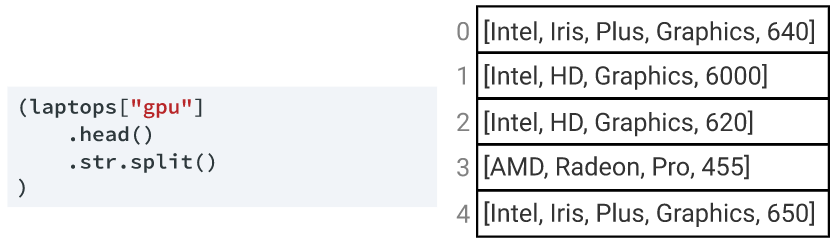

This method splits each string on the whitespace; the result is a series containing individual Python lists. Also note that we used parentheses to method chain over multiple lines, which makes our code easier to read.

Just like with lists and ndarrays, we can use bracket notation to access the elements in each list in the series. With series, however, we use the str accessor followed by [] (brackets):

In [92]:
laptops["gpu"].head().str.split().str[0]   # Access the first element of all rows

0    Intel
1    Intel
2    Intel
3      AMD
4    Intel
Name: gpu, dtype: object

In [93]:
laptops["gpu"].head().str.split()[0]  # Access the whole list in the 0th row

['Intel', 'Iris', 'Plus', 'Graphics', '640']

Let's use this technique to extract the manufacturer from the cpu column as well. Here are the first 5 rows of the cpu column:

In [94]:
laptops['cpu_manufacturer'] = (laptops['cpu']
                                      .str.split()
                                      .str[0])

cpu_manufacturer_counts = laptops['cpu_manufacturer'].value_counts()

### Correcting bad values

#### `Series.map()`

If your data has been scraped from a webpage or if there was manual data entry involved at some point, you may end up with inconsistent values. Let's look at an example from our os column:

In [95]:
laptops["operating system"].value_counts()

Windows      1125
No OS          66
Linux          62
Chrome OS      27
macOS          13
Mac OS          8
Android         2
Name: operating system, dtype: int64

We can see that there are two variations of the Apple operating system — macOS — in our dataset: Mac OS and macOS. One way we can fix this is with the Series.map() method. The Series.map() method is ideal when we want to change multiple values in a column, but we'll use it now as an opportunity to learn how the method works.

The most common way to use Series.map() is with a dictionary. Let's look at an example using a series of misspelled fruit:

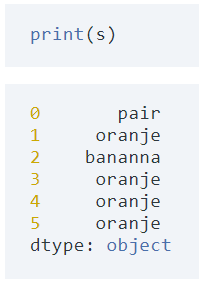

We'll create a dictionary called corrections and pass that dictionary as an argument to Series.map():

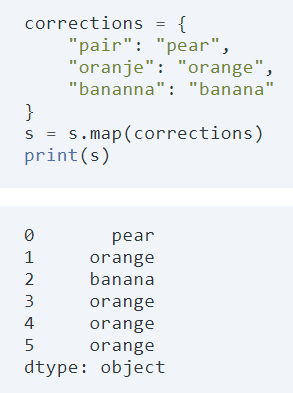

We can see that each of our corrections were made across our series. One important thing to remember with Series.map() is that if a value from your series doesn't exist as a key in your dictionary, it will convert that value to NaN. Let's see what happens when we run map one more time:

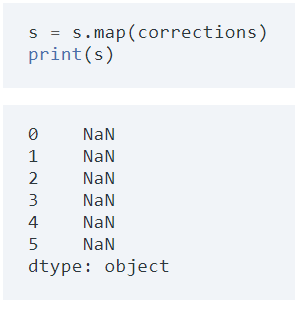


Because none of the corrected values in our series existed as keys in our dictionary, all values became NaN! It's a very common occurence, especially when working in Jupyter notebook, where you can easily re-run cells.

Let's use Series.map() to clean the values in the os column.

In [96]:
mapping_dict = {
    'Android': 'Android',
    'Chrome OS': 'Chrome OS',
    'Linux': 'Linux',
    'Mac OS': 'macOS',
    'No OS': 'No OS',
    'Windows': 'Windows',
    'macOS': 'macOS'
}


laptops['operating system'] = laptops['operating system'].map(mapping_dict)

In [97]:
laptops['operating system']

0         macOS
1         macOS
2         No OS
3         macOS
4         macOS
         ...   
1298    Windows
1299    Windows
1300    Windows
1301    Windows
1302    Windows
Name: operating system, Length: 1303, dtype: object

### Dropping missing values

In previous missions, we've talked briefly about missing values and how both NumPy and pandas represent these as null values. In pandas, null values will be indicated by either NaN or None.

Recall that we can use the DataFrame.isnull() method to identify missing values, which returns a boolean dataframe. We can then use the DataFrame.sum() method to give us a count of the True values for each column:

In [98]:
print(laptops.isnull().sum())

manufacturer                  0
model name                    0
category                      0
screen_size_inches            0
screen                        0
cpu                           0
ram_gb                        0
storage                       0
gpu                           0
operating system              0
operating system version    170
weight                        0
price euros                   0
cpu_manufacturer              0
dtype: int64


It's now clear that we have only one column with null values, os_version, which has 170 missing values.

There are a few options for handling missing values:

- Remove any rows that have missing values.
- Remove any columns that have missing values.
- Fill the missing values with some other value.
- Leave the missing values as is.

The first two options are often used to prepare data for machine learning algorithms, which are unable to be used with data that includes null values. We can use the DataFrame.dropna() method to remove or **drop rows and columns with null values**.

The DataFrame.dropna() method accepts an axis parameter, which indicates whether we want to drop along the column or index axis. Let's look at an example:

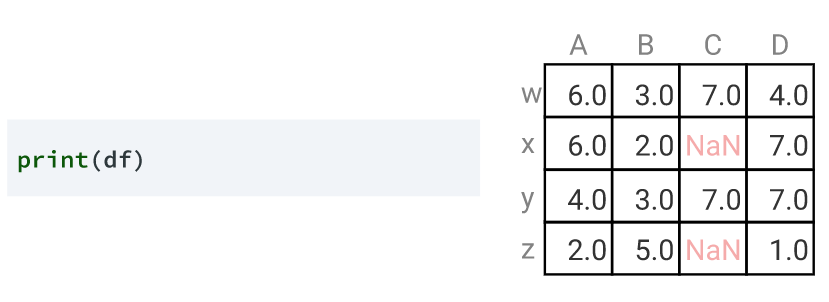

The default value for the axis parameter is 0, so df.dropna() returns an identical result to df.dropna(axis=0):

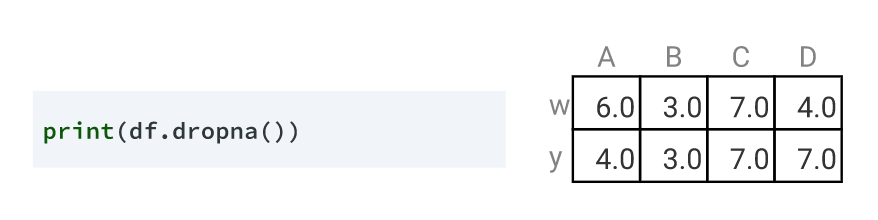

The rows with labels x and z contain null values, so those rows are dropped. Let's look at what happens when we use axis=1 to specify the column axis:

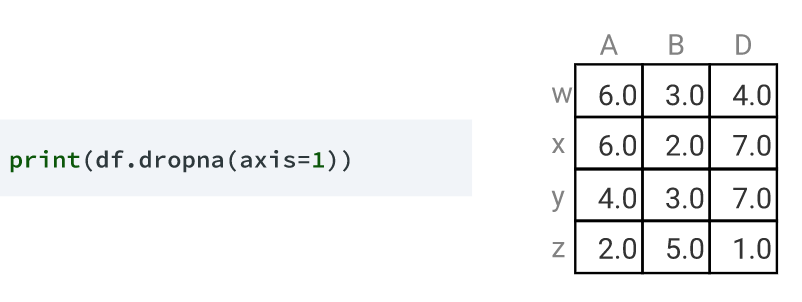

Only the column with label C contains null values, so, in this case, just one column is removed.

### Filling missing values

While dropping rows or columns is the easiest approach to deal with missing values, it may not always be the best approach. For example, removing a disproportionate amount of one manufacturer's laptops could change our analysis.

Because of this, it's a good idea to explore the missing values in the os_version column before making a decision. We can use Series.value_counts() to explore all of the values in the column, but we'll use a parameter we haven't seen before:

In [99]:
print(laptops["operating system version"].value_counts(dropna=False))

10      1072
NaN      170
7         45
10 S       8
X          8
Name: operating system version, dtype: int64


Because we set the dropna parameter to False, the result includes null values. We can see that the majority of values in the column are 10 and missing values are the next most common.

Let's also explore the os column, since it's is closely related to the os_version column. We'll only look at rows in which the os_version is missing:

In [100]:
os_with_null_v = laptops.loc[laptops["operating system version"].isnull(),"operating system"]

os_with_null_v.value_counts()

No OS        66
Linux        62
Chrome OS    27
macOS        13
Android       2
Name: operating system, dtype: int64

Immediately, we can observe a few things:

The most frequent value is "No OS". This is important to note because if there is no os, there shouldn't be a version defined in the os_version column.

Thirteen of the laptops that come with macOS do not specify the version. **We can use our knowledge of MacOS** to confirm that os_version should be equal to X

In both of these cases, we can fill the missing values to make our data more correct. For the rest of the values, it's probably best to leave them as missing so we don't remove important values.

We can use assignment with a boolean comparison to perform this replacement, like below:



In [101]:
laptops.loc[laptops["operating system"] == "macOS", "operating system version"] = "X"

For rows with No OS values, let's replace the missing value in the os_version column with the value Version Unknown.

In [102]:
laptops.loc[laptops["operating system"] == "No OS", "operating system version"] = "Version Unknown"

## Challenge: clean a string column

We'll clean the weight column. Let's look at a sample of the data in that column:

In [103]:
print(laptops["weight"].head())

0    1.37kg
1    1.34kg
2    1.86kg
3    1.83kg
4    1.37kg
Name: weight, dtype: object


Your challenge is to convert the values in this column to numeric values and save it into a csv file.

In [104]:
laptops['weight'] = laptops['weight'].str.replace('kgs','').str.replace('kg','').astype(float)

# Renaming
laptops = laptops.rename({'weight': 'weight_kg'}, axis = 1)

# Saving
laptops.to_csv('laptops_cleaned.csv', index = False)